<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

Before runing this demo, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [1]:
#Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
# Import all necessary libraries.
import sys
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import copy

# NomeroffNet path
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

In [3]:
from NomeroffNet.YoloV5Detector import Detector

detector = Detector()
detector.load()

/usr/local/lib64/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [4]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

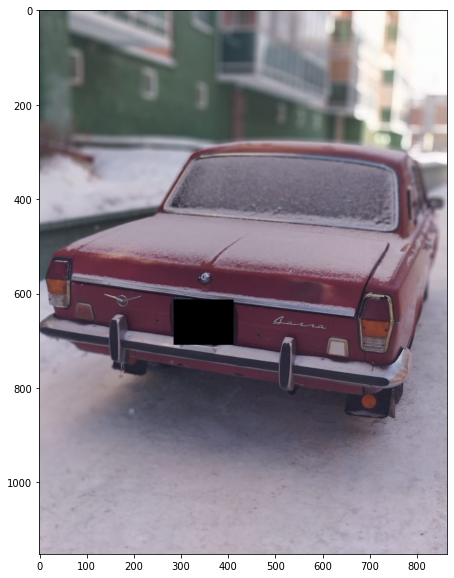

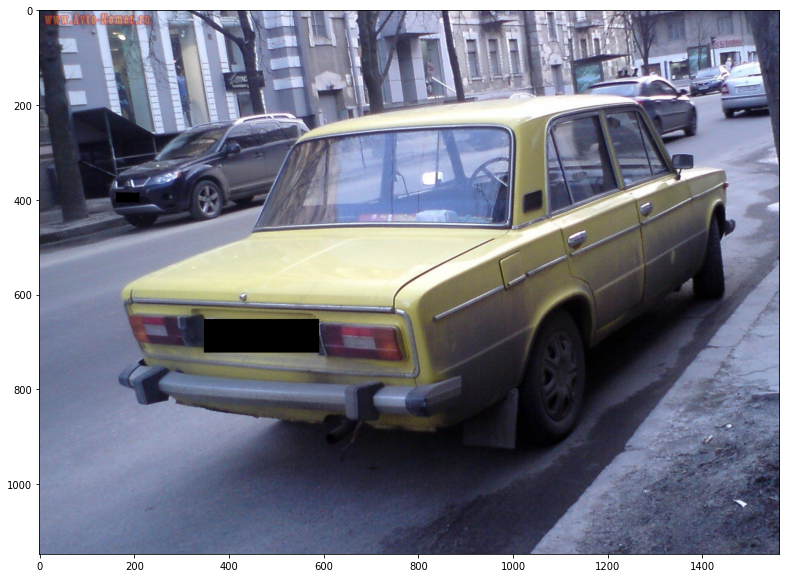

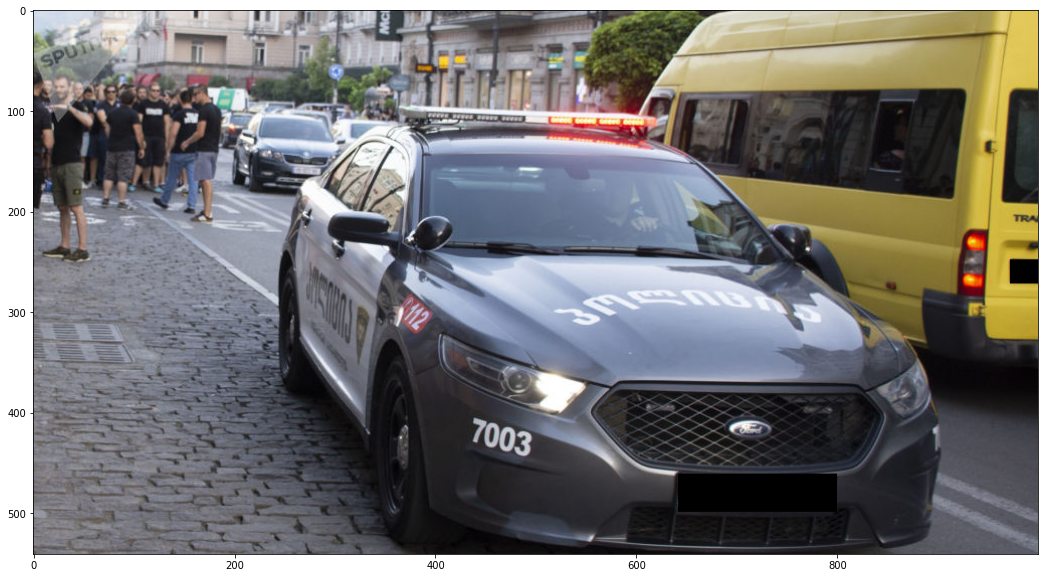

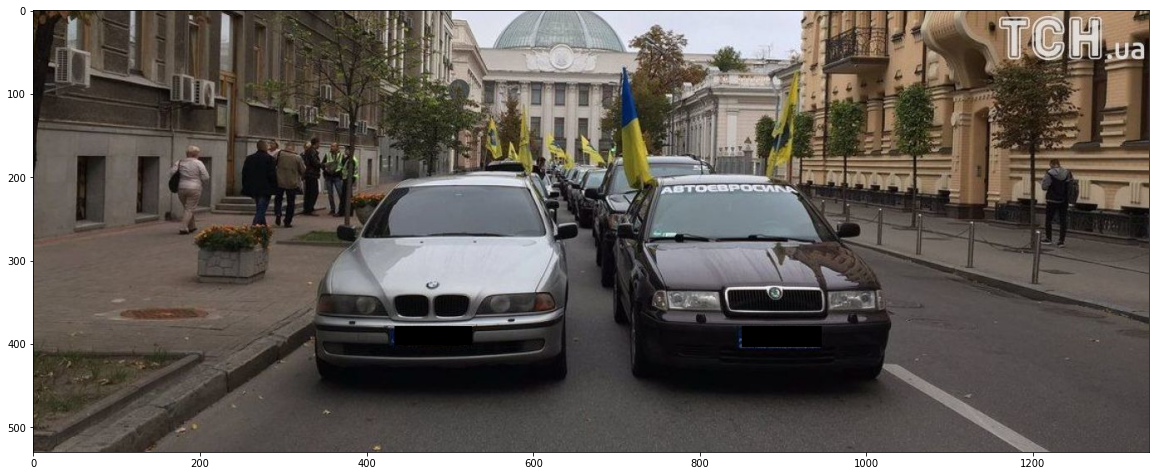

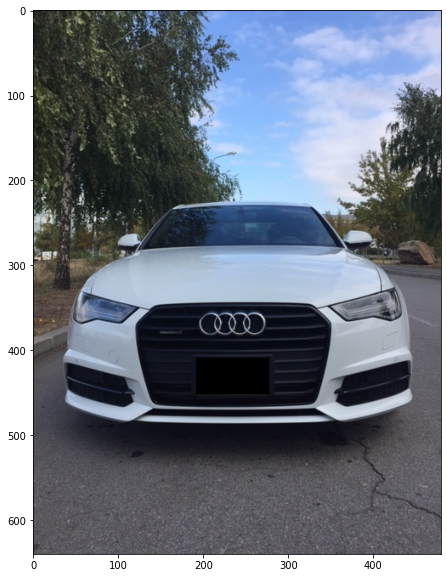

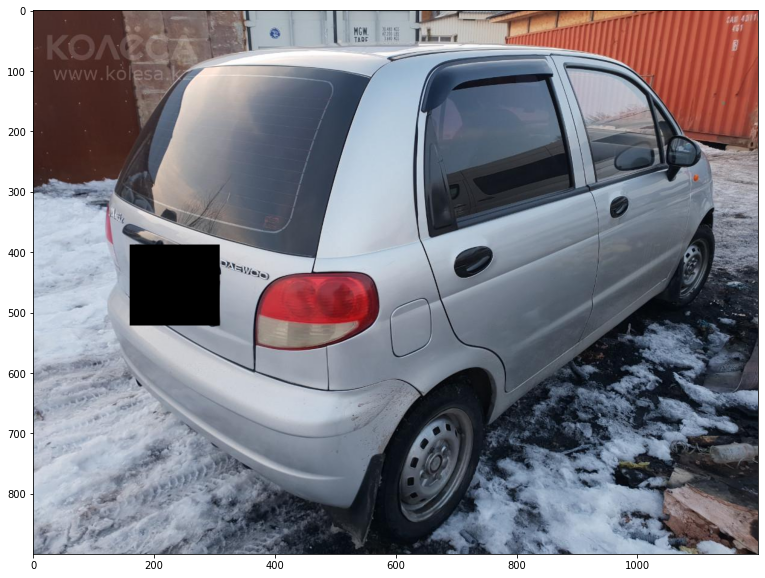

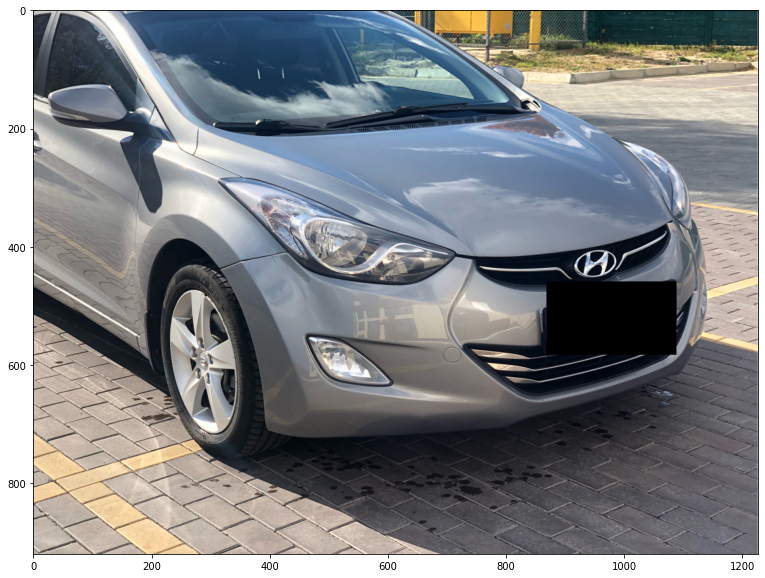

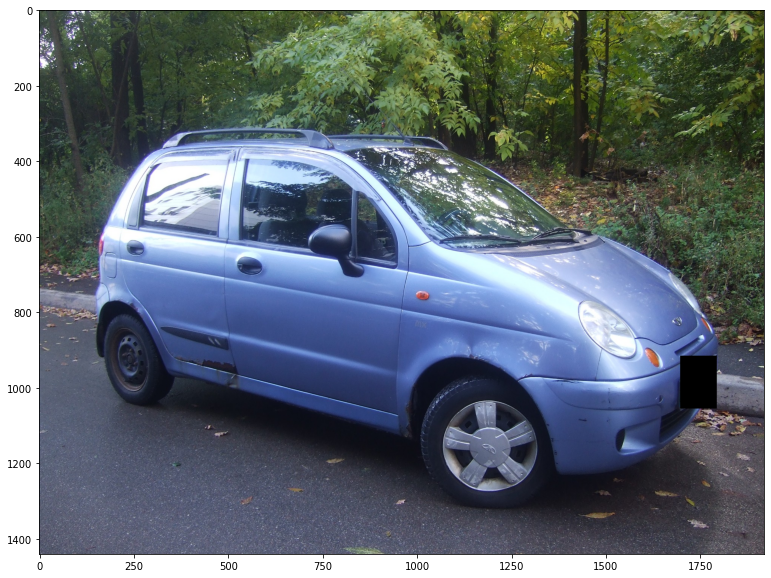

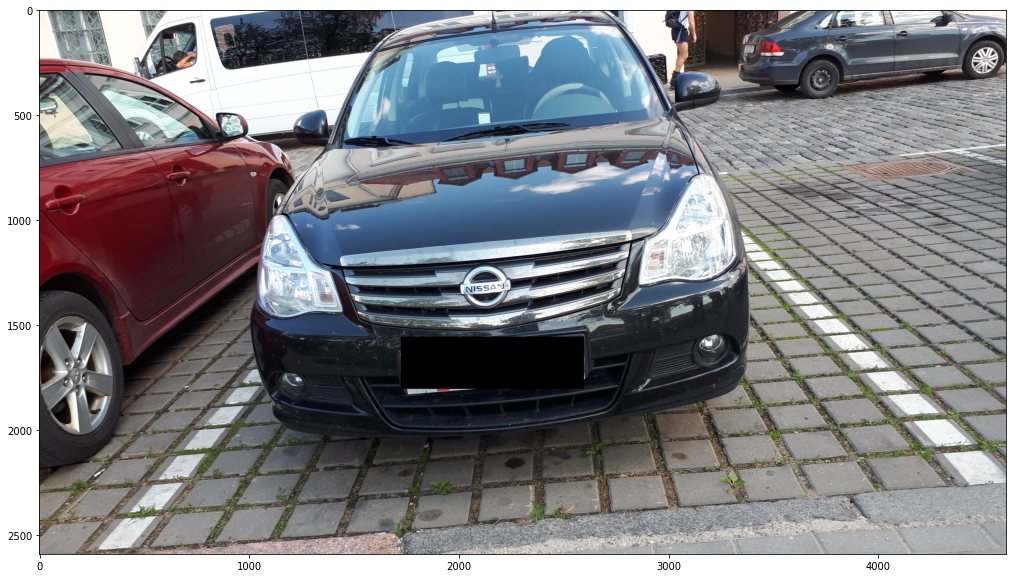

In [5]:
rootDir = 'images/*'

imgs = [mpimg.imread(img_path) for img_path in glob.glob(rootDir)]

for img in imgs:
    targetBoxes = detector.detect_bbox(copy.deepcopy(img))
    targetBoxes = targetBoxes
    
    # draw rect and 4 points
    for targetBox in targetBoxes:
        cv2.rectangle(img, 
                      (int(targetBox[0]), int(targetBox[1])), 
                      (int(targetBox[2]), int(targetBox[3])), 
                      (0,0,0), 
                      -1)
    plt.imshow(img)
    plt.show()